In [2]:
from tdlearning.experiments.experiments import *
from tdlearning.utils.utils import *
from tdlearning.envs.env_wrappers import *
import os 
from tdlearning.agents.SRAgent import TDSR_WM
from tdlearning.plot.utils import *
from tqdm import tqdm
import concurrent.futures

### Generalization experiments


In [3]:
path = os.path.join('data','tdlearning')
plot_path = os.path.join('plots','tdlearning')
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']


In [7]:

n_repetitions = 200
num_steps = 400
num_episodes = 400
lr = 1e-1
gamma = 0.7


env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    results_sym = []
    results_asym = []

    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(run_experiment, env_name, seed=i,lr=lr,gamma=gamma,num_steps=num_steps,num_episodes=num_episodes) for i in range(n_repetitions)]
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing {env_name}"):
            steps_sym, steps_asym = future.result()
            results_sym.append(steps_sym)
            results_asym.append(steps_asym)

    results_sym = np.array(results_sym)
    results_asym = np.array(results_asym)

    save_generalization_data((results_sym, results_asym), agents=['symmetric', 'asymmetric'], path=path, suffices=[env_name])


Processing empty: 100%|██████████| 200/200 [01:57<00:00,  1.70it/s]

saved data at data/tdlearning/gen_steps_symmetric_empty.npy
saved data at data/tdlearning/gen_steps_asymmetric_empty.npy



Processing four_rooms: 100%|██████████| 200/200 [04:17<00:00,  1.29s/it]

saved data at data/tdlearning/gen_steps_symmetric_four_rooms.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms.npy



Processing t_maze: 100%|██████████| 200/200 [04:13<00:00,  1.27s/it]

saved data at data/tdlearning/gen_steps_symmetric_t_maze.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze.npy



Processing circle: 100%|██████████| 200/200 [03:33<00:00,  1.07s/it]

saved data at data/tdlearning/gen_steps_symmetric_circle.npy
saved data at data/tdlearning/gen_steps_asymmetric_circle.npy



Processing detour: 100%|██████████| 200/200 [08:51<00:00,  2.66s/it]


saved data at data/tdlearning/gen_steps_symmetric_detour.npy
saved data at data/tdlearning/gen_steps_asymmetric_detour.npy


Processing obstacle: 100%|██████████| 200/200 [06:47<00:00,  2.04s/it]


saved data at data/tdlearning/gen_steps_symmetric_obstacle.npy
saved data at data/tdlearning/gen_steps_asymmetric_obstacle.npy


(800,)
(800,)
(800,)
(800,)


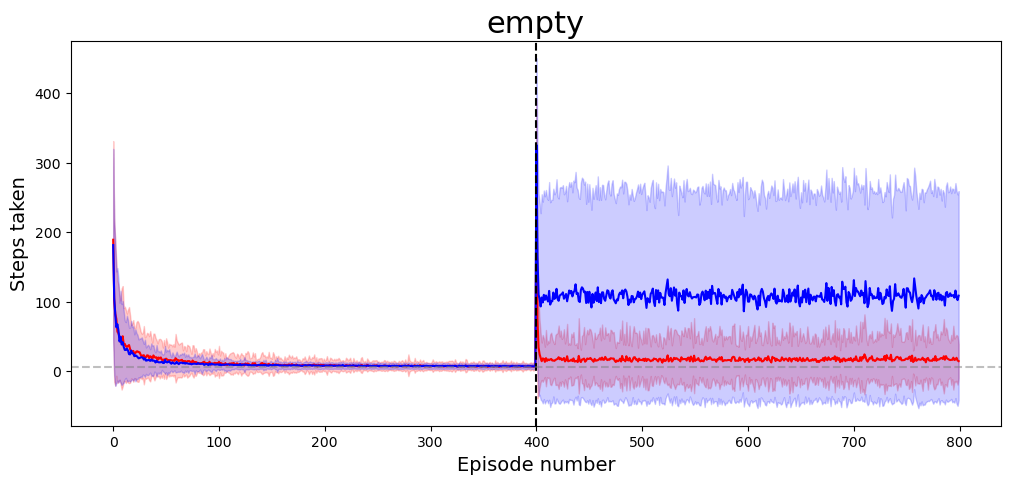

(800,)
(800,)
(800,)
(800,)


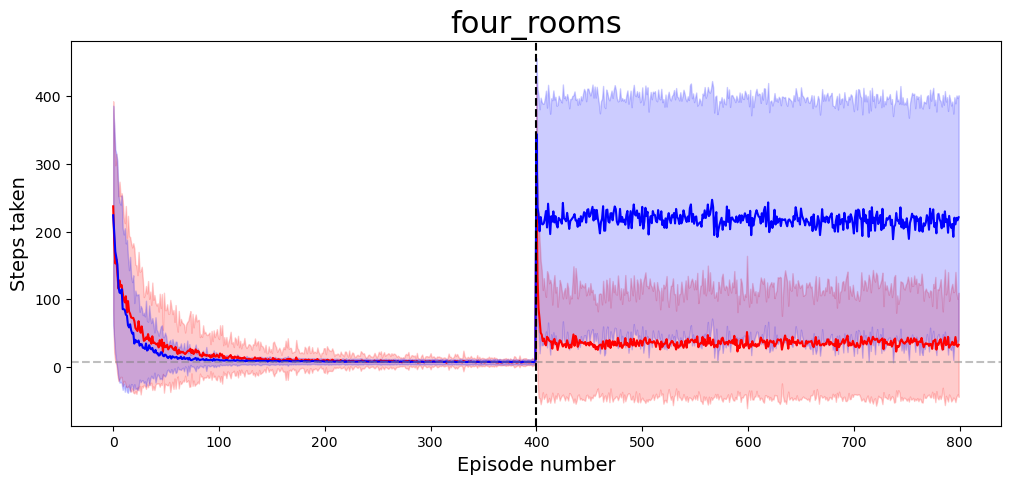

(800,)
(800,)
(800,)
(800,)


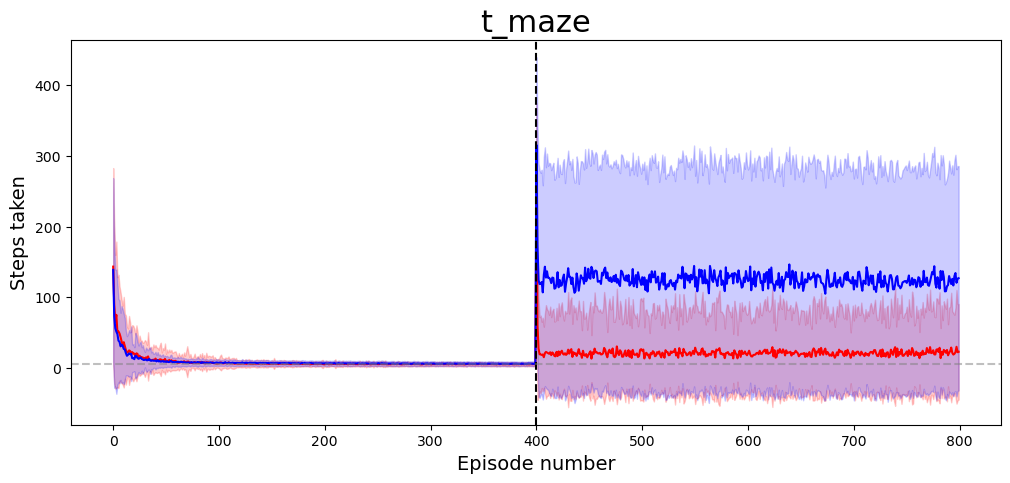

(800,)
(800,)
(800,)
(800,)


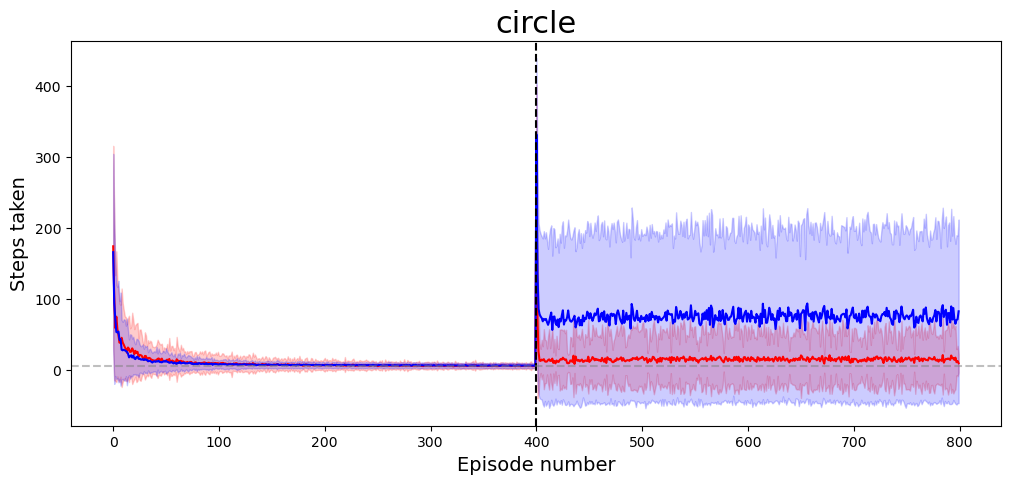

(800,)
(800,)
(800,)
(800,)


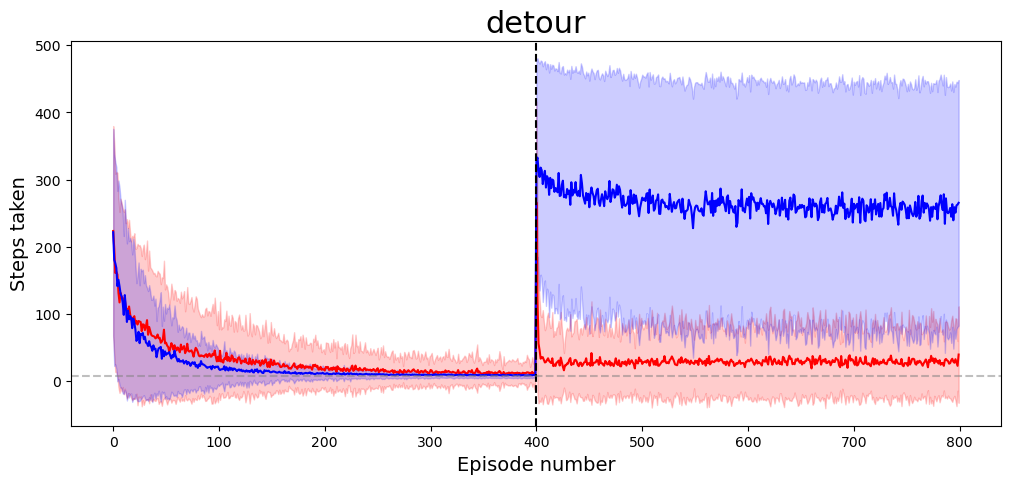

(800,)
(800,)
(800,)
(800,)


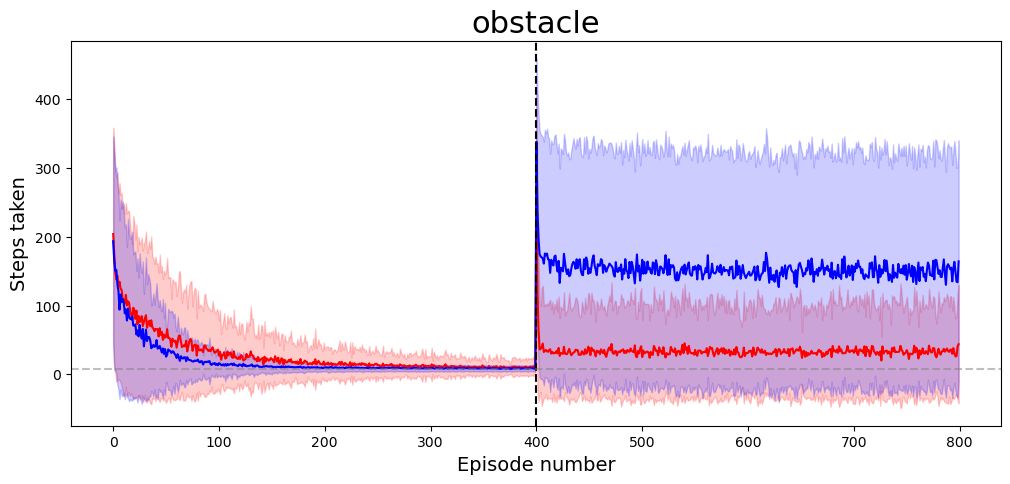

In [4]:

env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

plot_path = os.path.join('plots','tdlearning')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
for env_name in env_list:
    suffices = [env_name]
    env = create_grid_env(env_name)

    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    save_path = os.path.join(plot_path,'generalization_{}.png'.format(env_name))
    fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound,title=env_name)
    
    plt.show()

### Fixed performance instead of fixed number of episodes

In [4]:

n_repetitions = 200
num_steps = 400
num_episodes = 400
lr = 1e-1
gamma = 0.7


env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    results_sym = []
    results_asym = []

    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(run_experiment, env_name, seed=i,lr=lr,gamma=gamma,num_steps=num_steps,num_episodes=num_episodes,mode='performance') for i in range(n_repetitions)]
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing {env_name}"):
            steps_sym, steps_asym = future.result()
            results_sym.append(steps_sym)
            results_asym.append(steps_asym)

    results_sym = np.array(results_sym)
    results_asym = np.array(results_asym)
    suffices = [env_name,'p_crit']
    save_generalization_data((results_sym, results_asym), agents=['symmetric', 'asymmetric'], path=path, suffices=suffices)


Processing empty: 100%|██████████| 200/200 [00:50<00:00,  3.93it/s]

saved data at data/tdlearning/gen_steps_symmetric_empty_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_empty_p_crit.npy



Processing four_rooms: 100%|██████████| 200/200 [01:23<00:00,  2.39it/s]

saved data at data/tdlearning/gen_steps_symmetric_four_rooms_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms_p_crit.npy



Processing t_maze: 100%|██████████| 200/200 [00:41<00:00,  4.82it/s]

saved data at data/tdlearning/gen_steps_symmetric_t_maze_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze_p_crit.npy



Processing circle: 100%|██████████| 200/200 [00:45<00:00,  4.40it/s]

saved data at data/tdlearning/gen_steps_symmetric_circle_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_circle_p_crit.npy



Processing detour: 100%|██████████| 200/200 [02:08<00:00,  1.55it/s]

saved data at data/tdlearning/gen_steps_symmetric_detour_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_detour_p_crit.npy



Processing obstacle: 100%|██████████| 200/200 [01:48<00:00,  1.85it/s]

saved data at data/tdlearning/gen_steps_symmetric_obstacle_p_crit.npy
saved data at data/tdlearning/gen_steps_asymmetric_obstacle_p_crit.npy


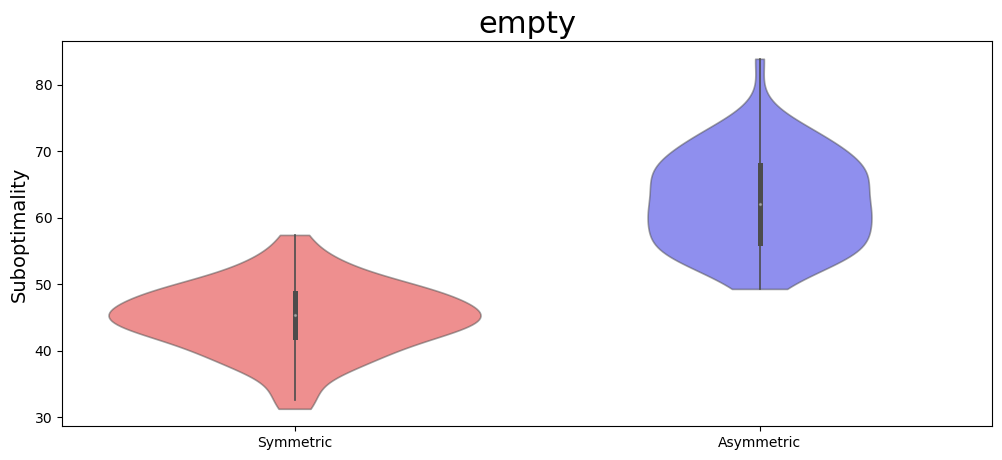

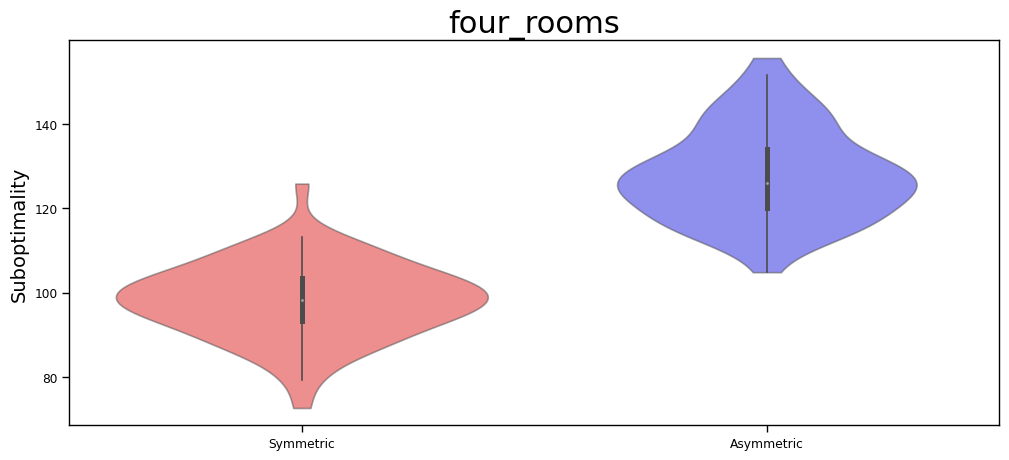

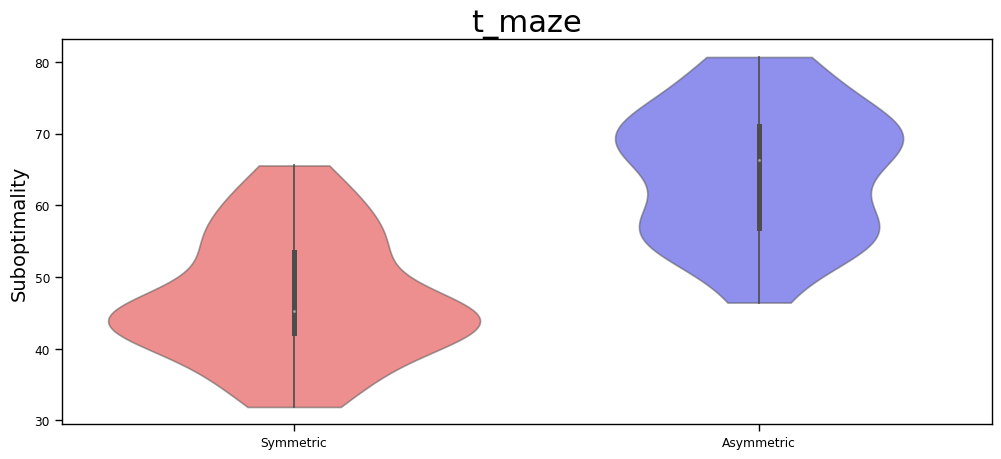

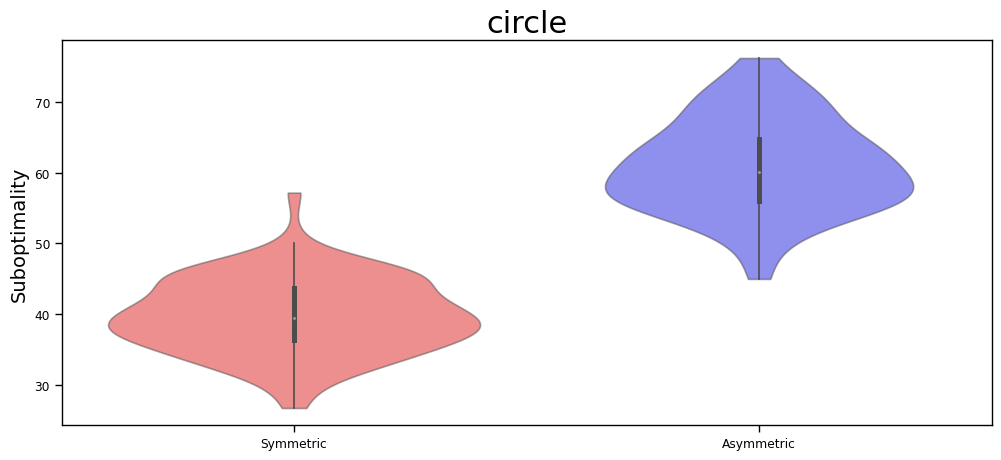

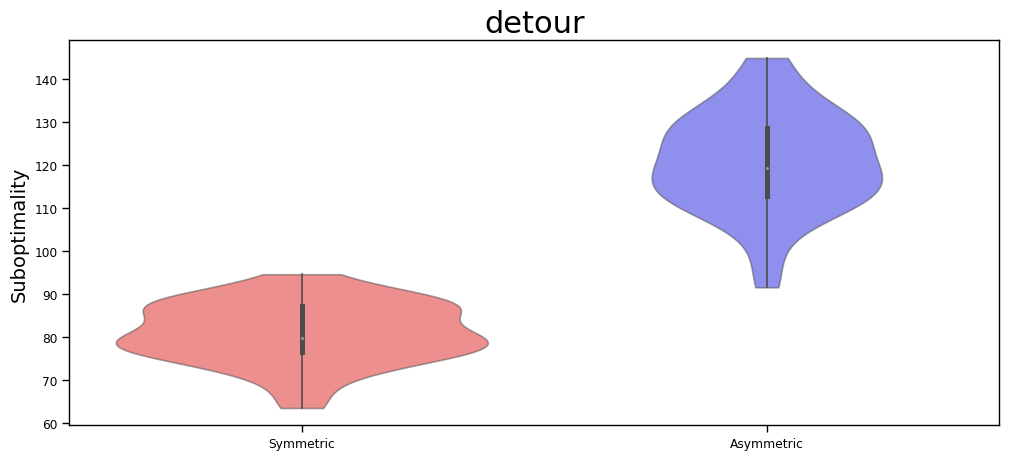

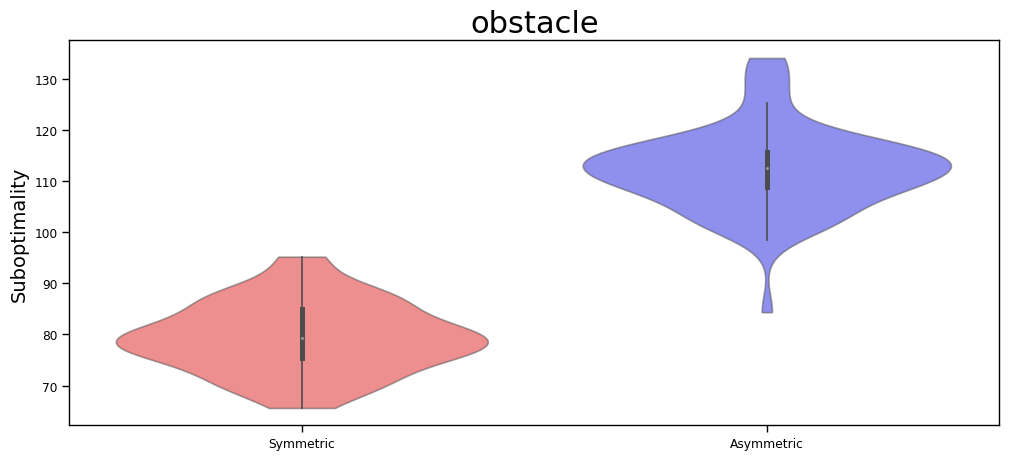

In [5]:
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    suffices = [env_name,'p_crit']
   
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    save_path = os.path.join(plot_path,'generalization_p_crit_{}.png'.format(env_name))
    fig,ax = create_violin_plot(steps_sym.mean(axis=0),steps_asym.mean(axis=0),save_path = save_path,title=env_name)
    
    plt.show()

### Mean over different environments

In [6]:
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']


(800,)
(800,)
(800,)
(800,)


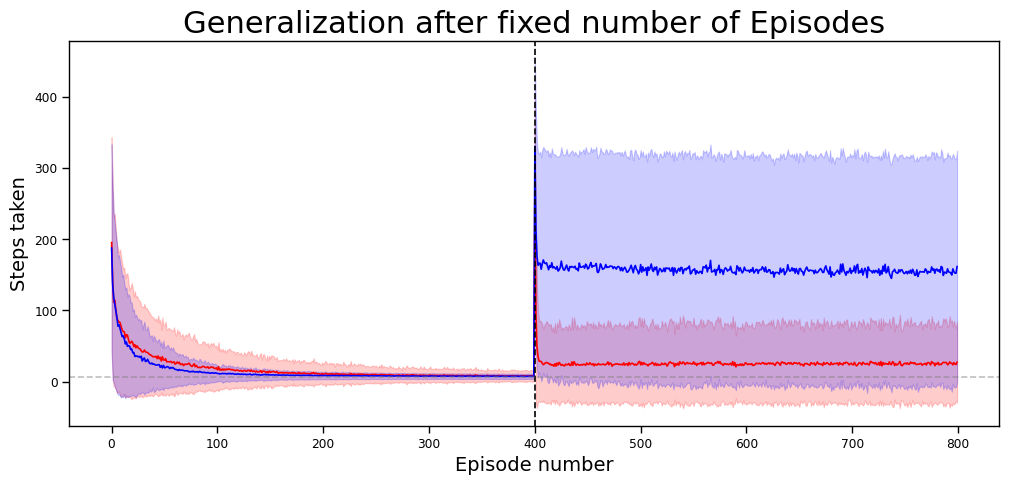

In [6]:
sym = []
sd_sym=[]
asym = []
sd_asym=[]
lbounds = []
for env_name in env_list:
    
    env = create_grid_env(env_name)

    suffices = [env_name]
    
    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    sym.append(steps_sym.mean(axis=0))
    sd_sym.append(steps_sym.std(axis=0))
    asym.append(steps_asym.mean(axis=0))
    sd_asym.append(steps_asym.std(axis=0))
    lbounds.append(lower_bound)

sym = np.array(sym)
asym = np.array(asym)
lower_bound = np.mean(lbounds)
#mean std over environments
std_sym  = np.mean(sd_sym,axis=0).flatten()
std_asym  = np.mean(sd_asym,axis=0).flatten()
save_path = os.path.join(plot_path,'generalization_mean_over_environments.png')

fig,ax = create_generalization_plot(sym,asym,stds=(std_sym,std_asym), save_path = save_path,lower_bound=lower_bound,title='Generalization after fixed number of Episodes')


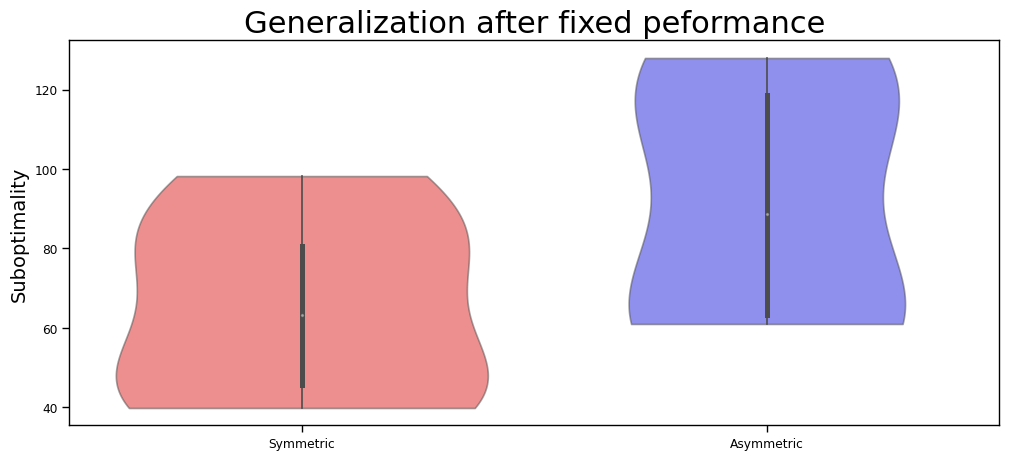

In [7]:
sym = []
asym = []
for env_name in env_list:
    

    suffices = [env_name,'p_crit']
    
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    sym.append(steps_sym.mean(axis=(0,1)))
    asym.append(steps_asym.mean(axis=(0,1)))

sym = np.array(sym)
asym = np.array(asym)

save_path = os.path.join(plot_path,'generalization_p_crit_mean_over_environments.png')

fig,ax = create_violin_plot(sym,asym,save_path = save_path,title='Generalization after fixed peformance')


In [ ]:
n_repetitions = 120
env_list = ['empty']
lrs = [1e-3,1e-2,1e-1,1]

gammas = [0.2,0.4,0.6,0.8]

lrs = [1e-3,1e-2,1e-1,1]

gammas = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]

for lr in lrs:
    for gamma in gammas:
        


        for env_name in env_list:


            results_sym = []
            results_asym = []

            with concurrent.futures.ProcessPoolExecutor() as executor:
                futures = [executor.submit(run_experiment, env_name, seed=i,lr=lr,gamma=gamma,num_steps=num_steps,num_episodes=num_episodes,mode='performance') for i in range(n_repetitions)]
                for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing {env_name}"):
                    steps_sym, steps_asym = future.result()
                    results_sym.append(steps_sym)
                    results_asym.append(steps_asym)

            results_sym = np.array(results_sym)
            results_asym = np.array(results_asym)
            suffices = [env_name,'p_crit','lr',str(int(lr*1000)),'gamma',str(int(gamma*10))]
            save_generalization_data((results_sym, results_asym), agents=['symmetric', 'asymmetric'], path=path, suffices=suffices)


Processing empty:  31%|███       | 37/120 [09:44<1:04:08, 46.37s/it]

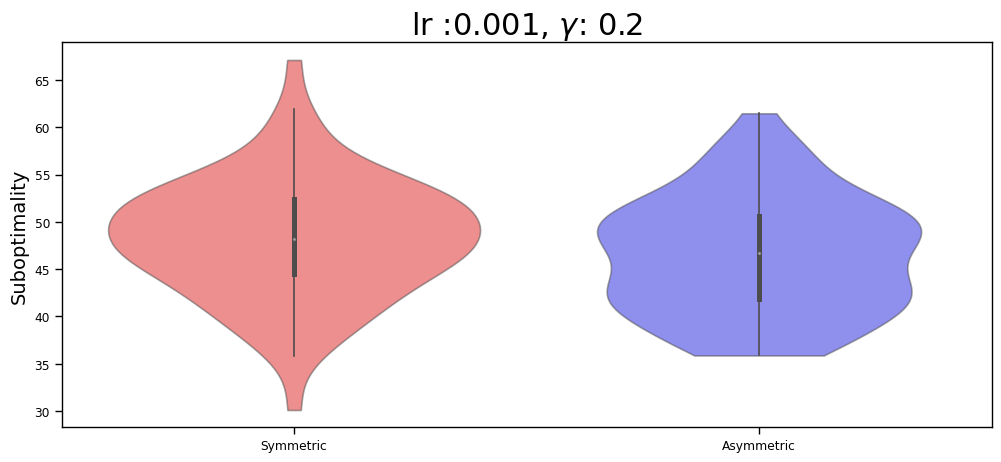

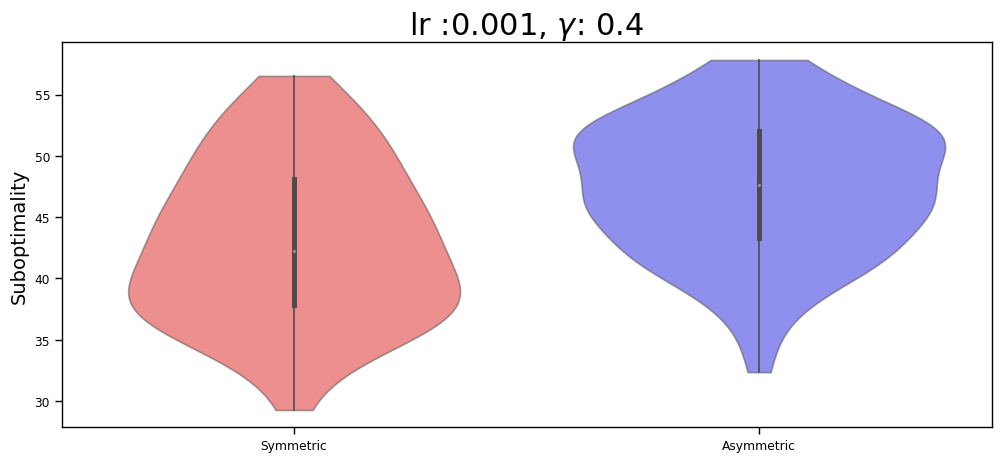

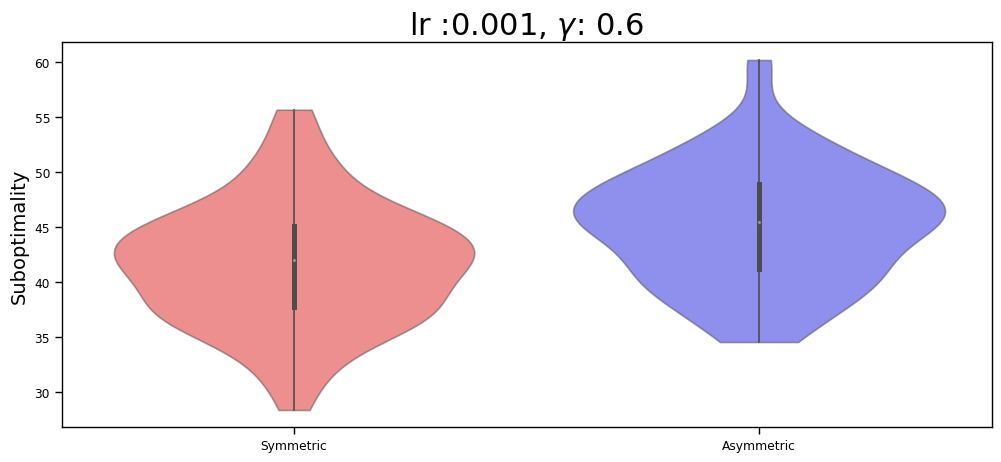

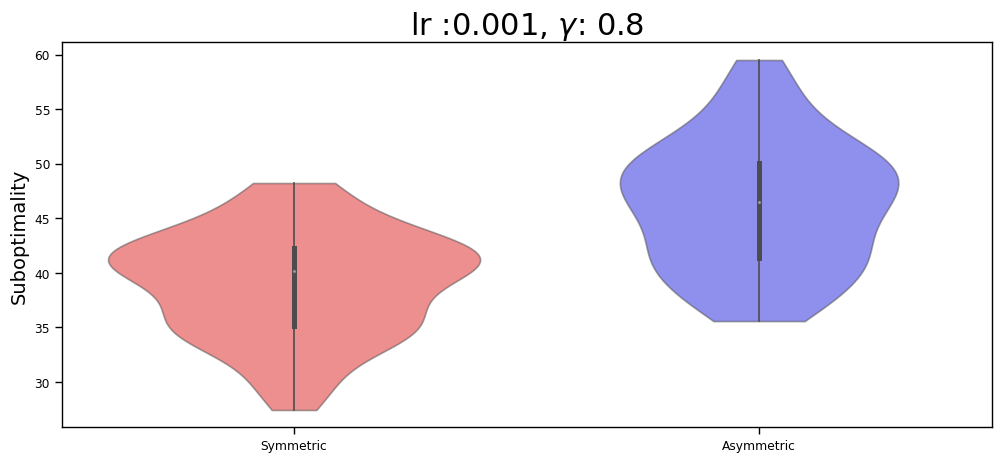

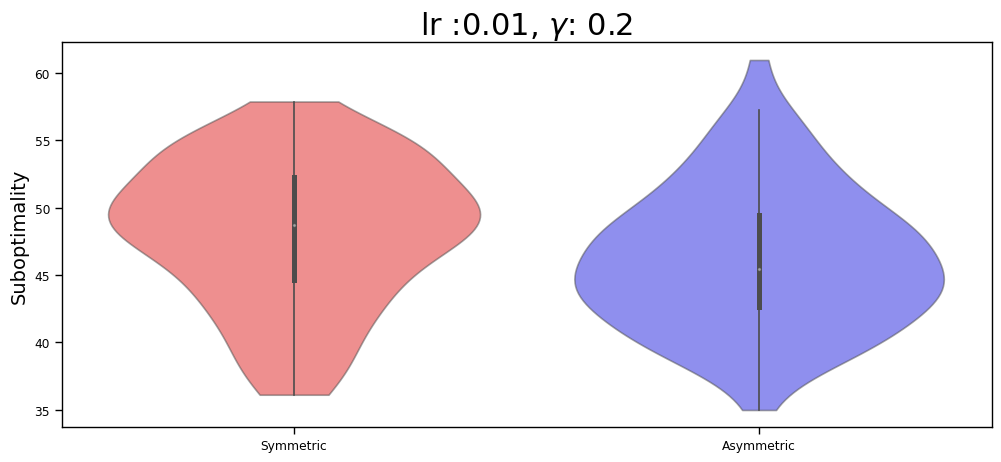

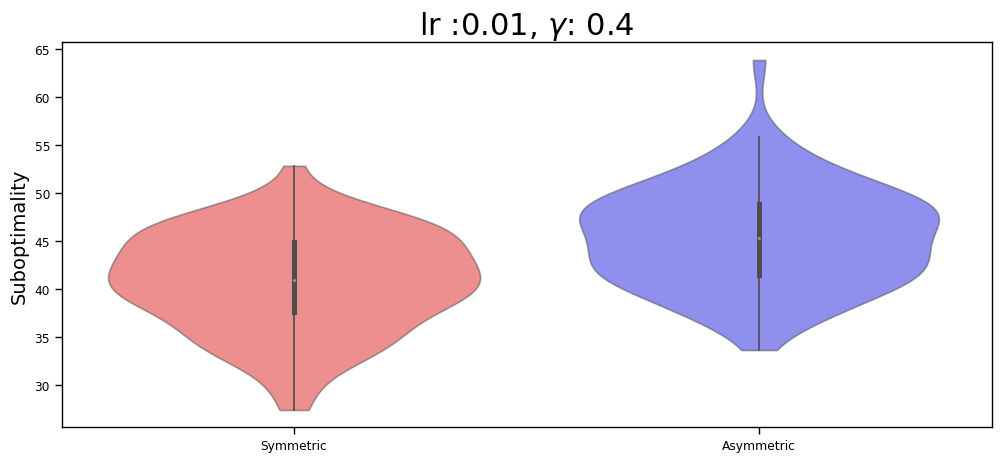

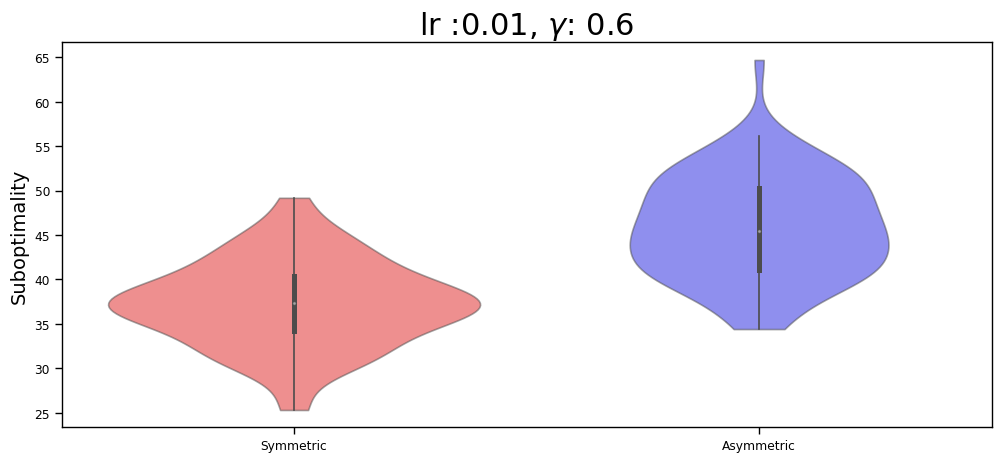

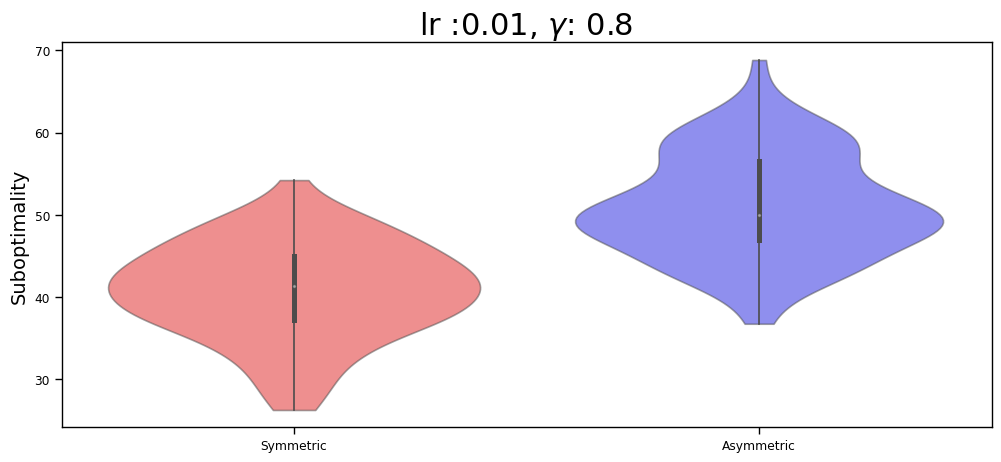

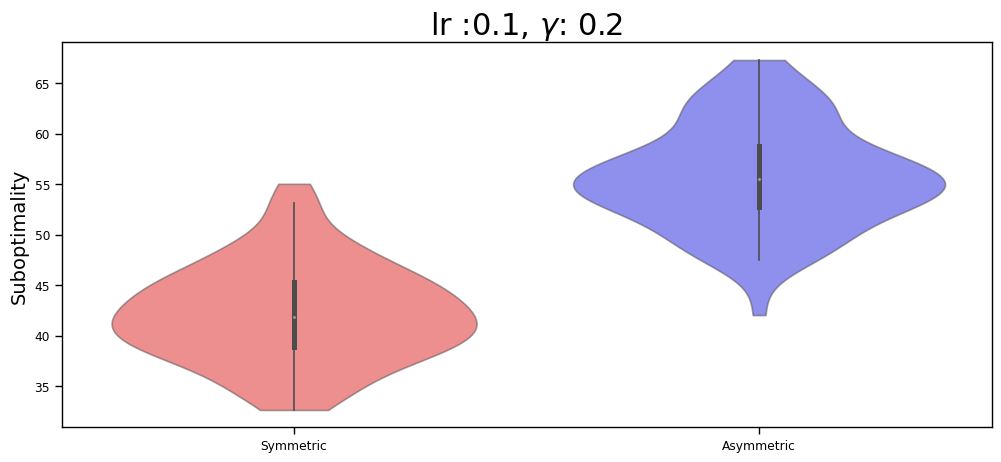

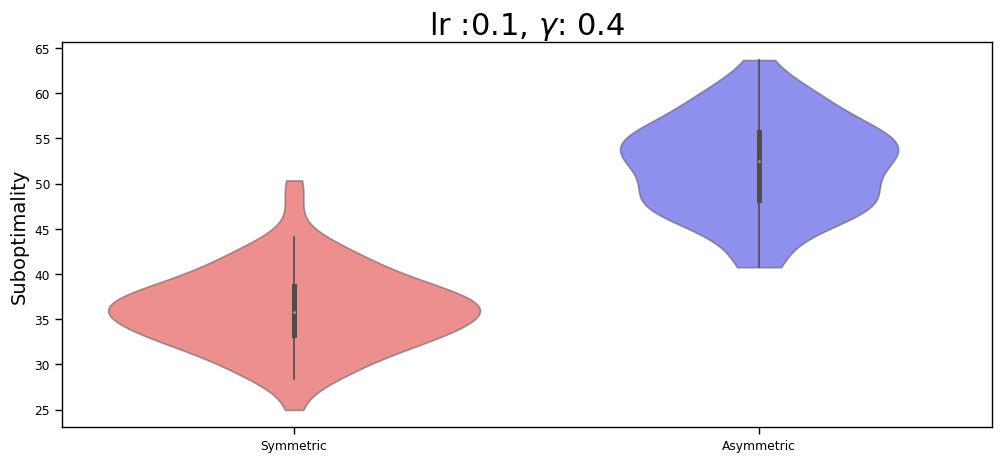

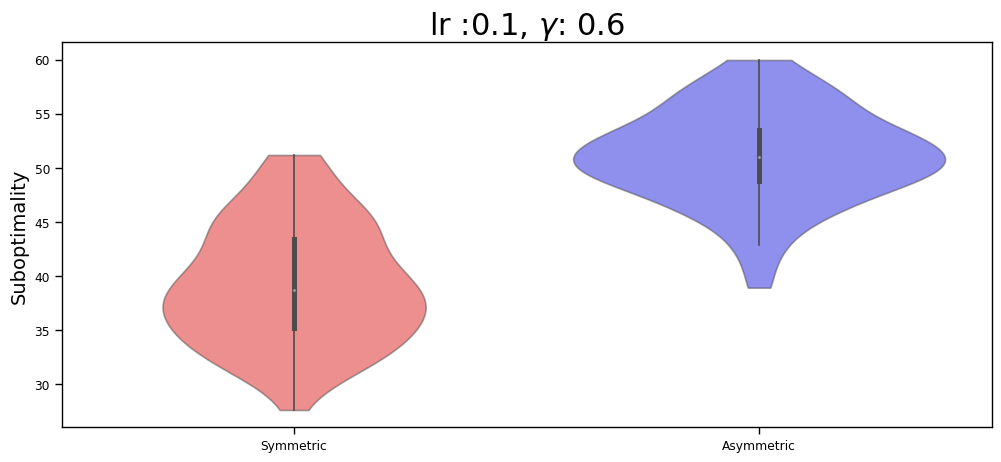

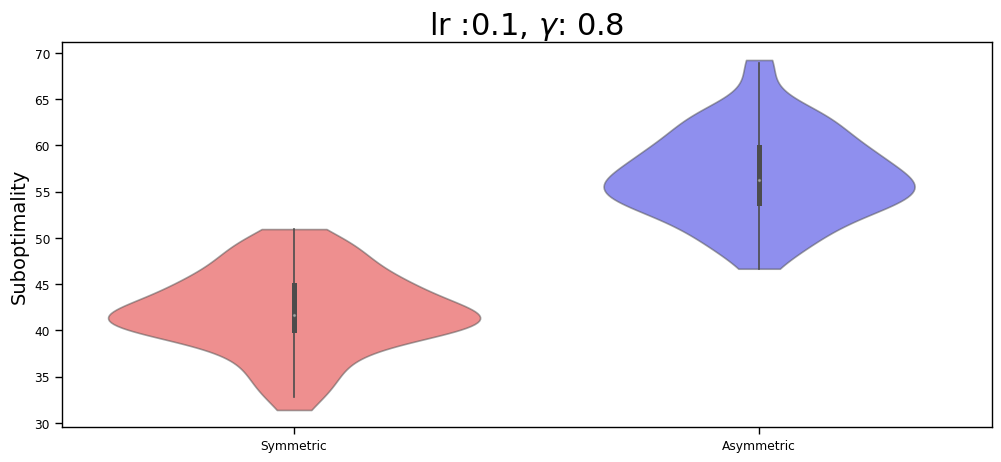

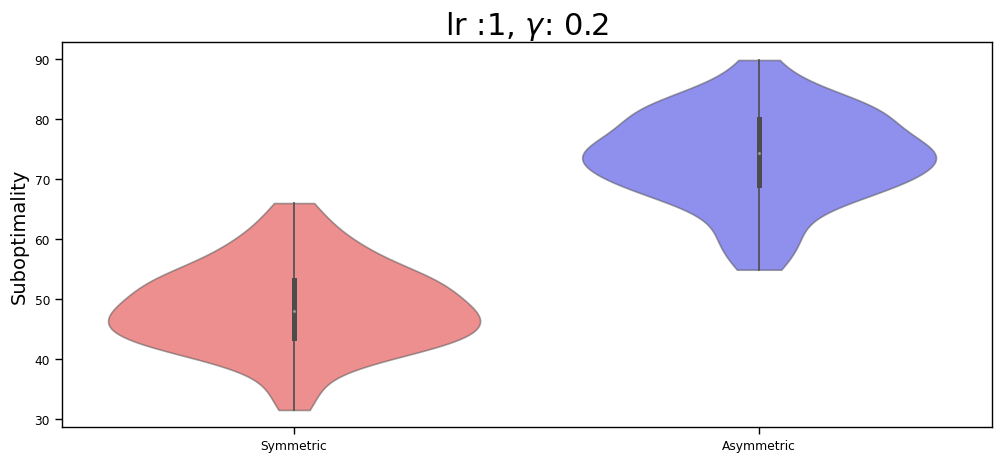

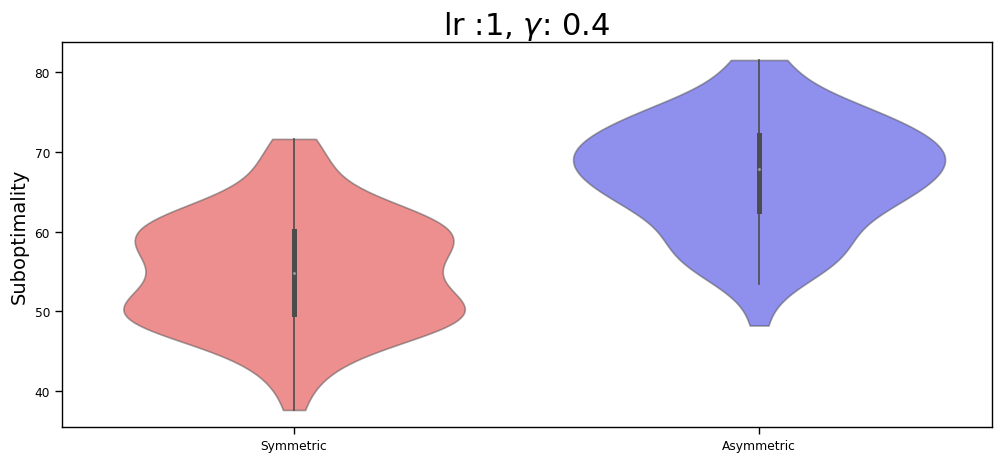

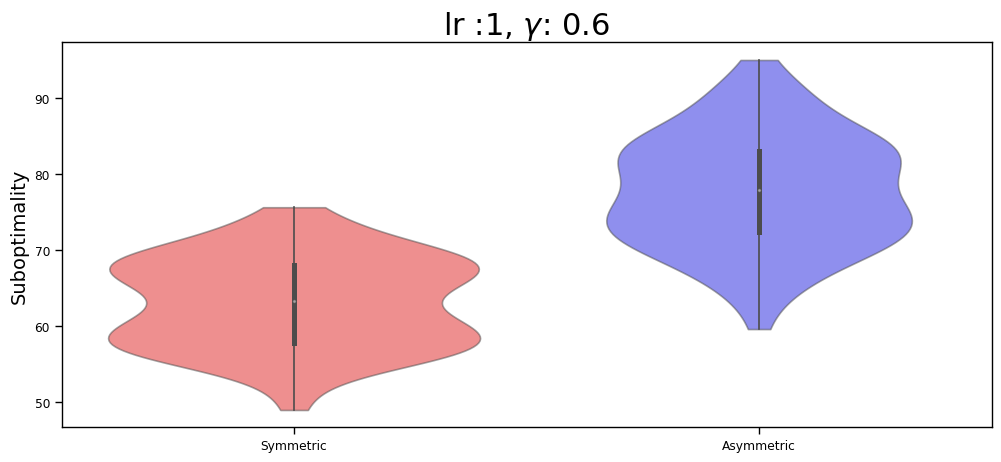

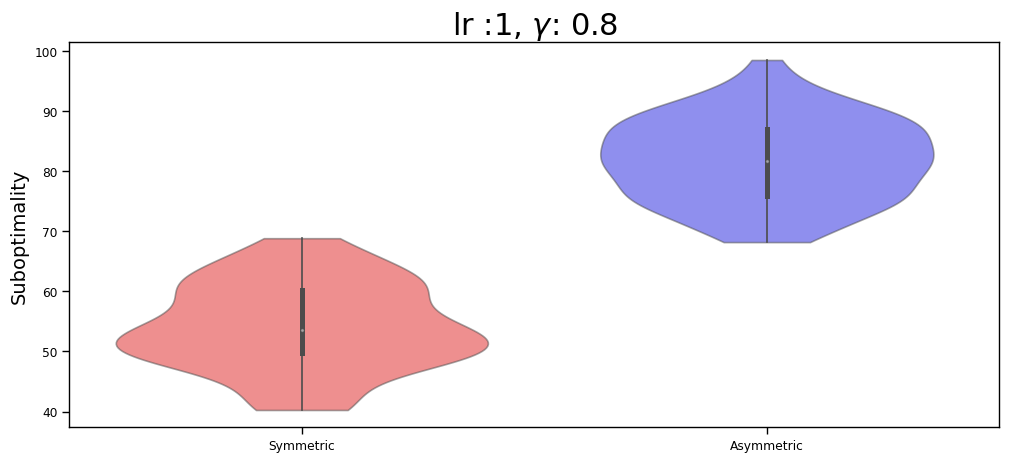

In [8]:
env_list = ['empty']

lrs = [1e-3,1e-2,1e-1,1]

gammas = [0.2,0.4,0.6,0.8]

for lr in lrs:
    for gamma in gammas:
        for env_name in env_list:
            suffices = [env_name,'p_crit','lr',str(lr*1000),'gamma',str(gamma*10)]

            steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)

            save_path = os.path.join(plot_path,'generalization_p_crit_{}_{}_{}.png'.format(env_name,str(int(lr*1000)),str(int(gamma*10))))
            fig,ax = create_violin_plot(steps_sym.mean(axis=0),steps_asym.mean(axis=0),save_path = save_path,title= r'lr :{}, $\gamma$: {}'.format(lr,gamma) )

            plt.show()

### Generalization experiments in tree environment





In [9]:
path = os.path.join('data','tdlearning')
plot_path = os.path.join('plots','tdlearning')

In [ ]:

n_repetitions = 200
num_steps = 100
num_episodes = 100
lr = 1e-1
gamma = 0.7


env_list=['tree']

for env_name in env_list:
    results_sym = []
    results_asym = []

    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(run_experiment, env_name, seed=i,lr=lr,gamma=gamma,num_steps=num_steps,num_episodes=num_episodes) for i in range(n_repetitions)]
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing {env_name}"):
            steps_sym, steps_asym = future.result()
            results_sym.append(steps_sym)
            results_asym.append(steps_asym)

    results_sym = np.array(results_sym)
    results_asym = np.array(results_asym)

    save_generalization_data((results_sym, results_asym), agents=['symmetric', 'asymmetric'], path=path, suffices=[env_name])


(200,)
(200,)
(200,)
(200,)


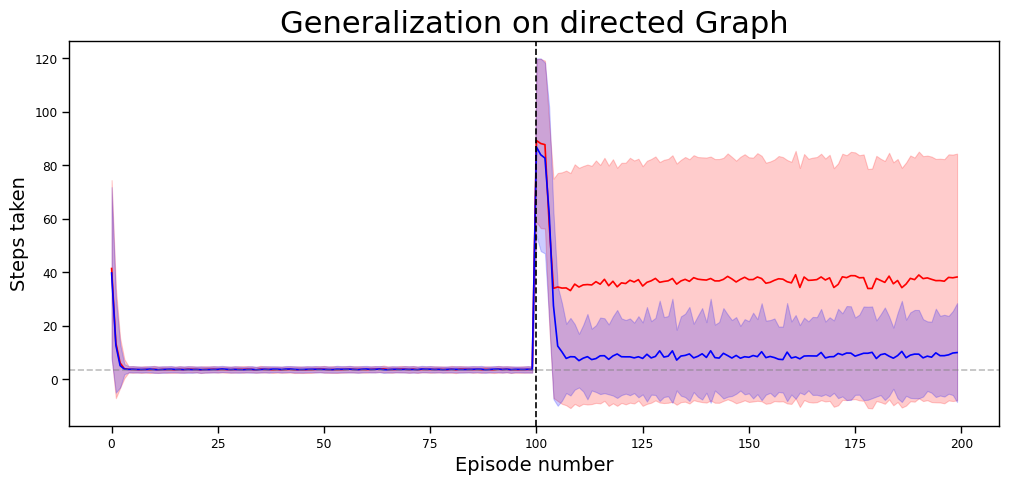

In [10]:
plot_path = os.path.join('plots','tdlearning')
suffices = ['tree']


leafs = [4,2,2]
env = create_circular_tree_graph(leafs)
steps_asym = []
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

lower_bound = env.G.mean_distance()

steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
save_path = os.path.join(plot_path,'generalization_{}.png'.format('tree_env'))
fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound,title='Generalization on directed Graph')



### Experiments with same policy while training

In [10]:
n_repetitions = 200
num_steps = 400
num_episodes = 400
lr = 1e-1
gamma = 0.7


In [18]:

n_repetitions = 200
num_steps = 400
num_episodes = 400
lr = 1e-1
gamma = 0.7


env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    results_sym = []
    results_asym = []

    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(run_experiment, env_name, seed=i,lr=lr,gamma=gamma,num_steps=num_steps,num_episodes=num_episodes,mode='copy') for i in range(n_repetitions)]
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing {env_name}"):
            steps_sym, steps_asym = future.result()
            results_sym.append(steps_sym)
            results_asym.append(steps_asym)

    results_sym = np.array(results_sym)
    results_asym = np.array(results_asym)
    suffices = [env_name,'same_policy']

    save_generalization_data((results_sym, results_asym), agents=['symmetric', 'asymmetric'], path=path, suffices=suffices)


Processing empty: 100%|██████████| 200/200 [06:08<00:00,  1.84s/it]

saved data at data/tdlearning/gen_steps_symmetric_empty_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_empty_same_policy.npy



Processing four_rooms: 100%|██████████| 200/200 [08:37<00:00,  2.59s/it]

saved data at data/tdlearning/gen_steps_symmetric_four_rooms_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms_same_policy.npy



Processing t_maze: 100%|██████████| 200/200 [04:02<00:00,  1.21s/it]

saved data at data/tdlearning/gen_steps_symmetric_t_maze_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze_same_policy.npy



Processing circle: 100%|██████████| 200/200 [03:14<00:00,  1.03it/s]


saved data at data/tdlearning/gen_steps_symmetric_circle_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_circle_same_policy.npy


Processing detour: 100%|██████████| 200/200 [07:51<00:00,  2.36s/it]


saved data at data/tdlearning/gen_steps_symmetric_detour_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_detour_same_policy.npy


Processing obstacle: 100%|██████████| 200/200 [05:53<00:00,  1.77s/it]

saved data at data/tdlearning/gen_steps_symmetric_obstacle_same_policy.npy
saved data at data/tdlearning/gen_steps_asymmetric_obstacle_same_policy.npy


(800,)
(800,)
(800,)
(800,)


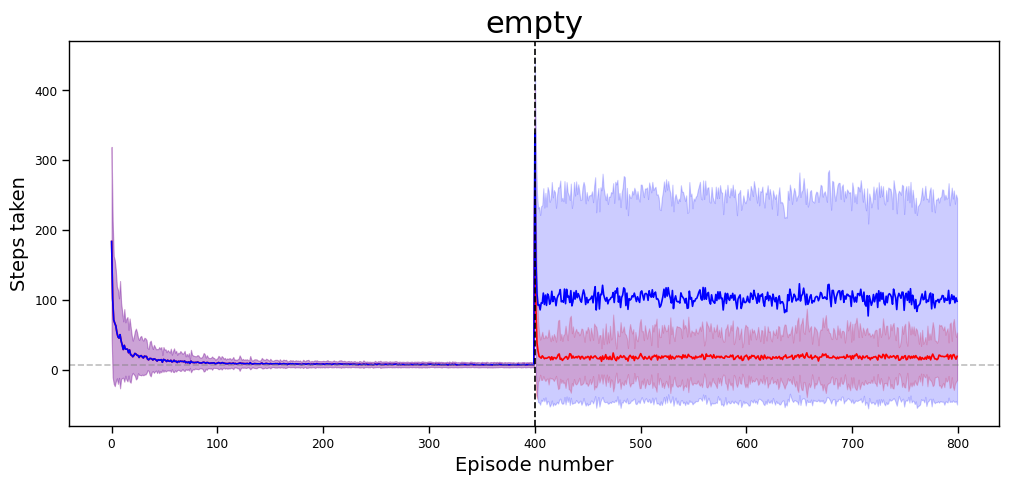

(800,)
(800,)
(800,)
(800,)


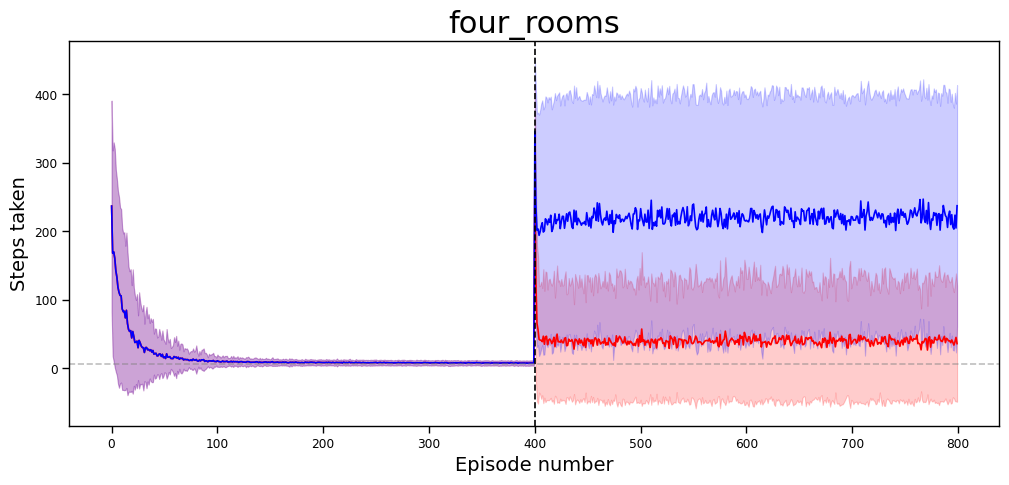

(800,)
(800,)
(800,)
(800,)


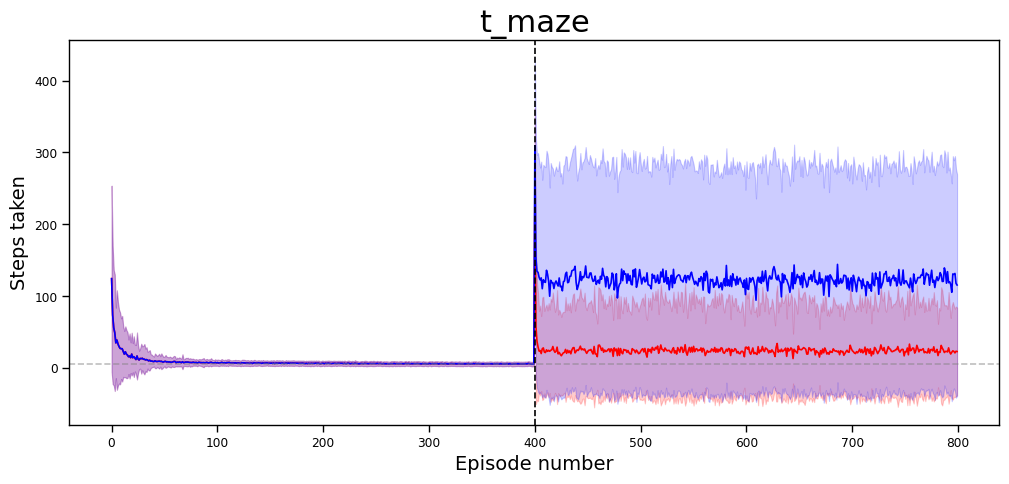

(800,)
(800,)
(800,)
(800,)


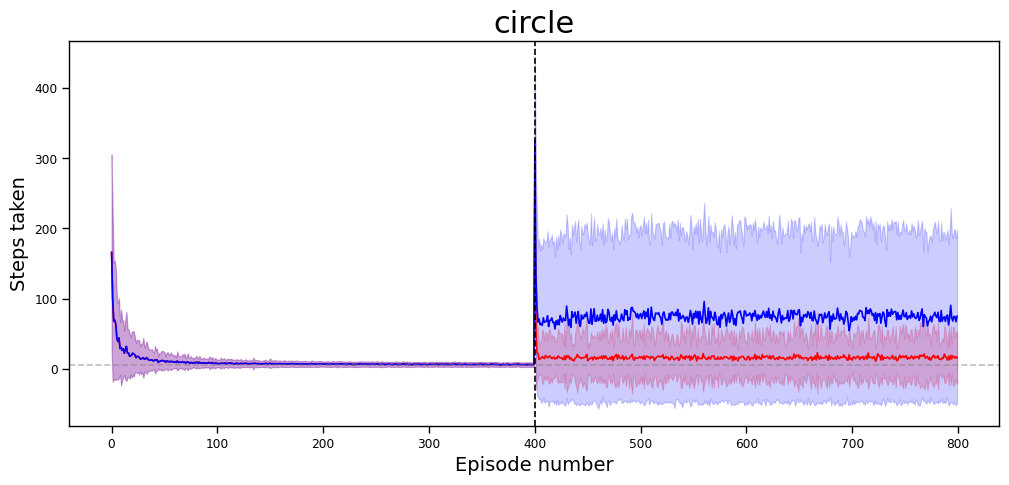

(800,)
(800,)
(800,)
(800,)


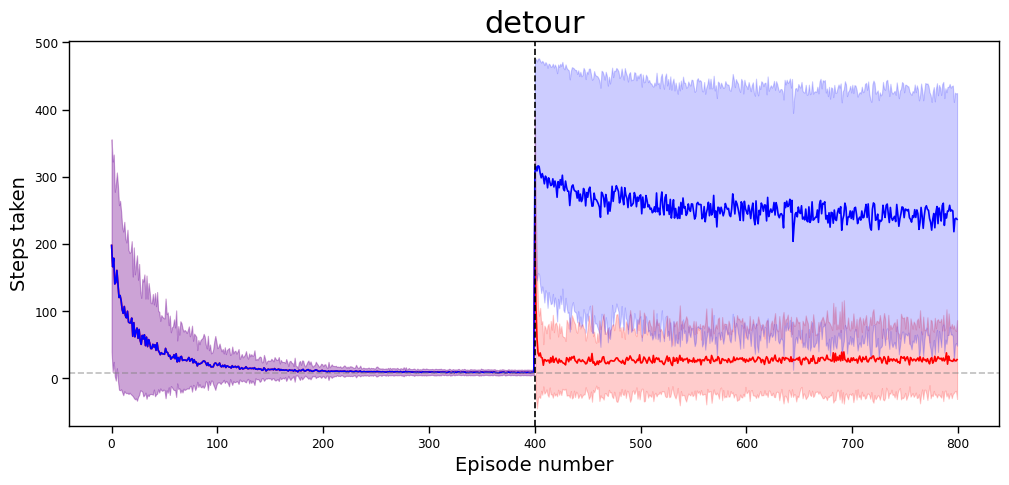

(800,)
(800,)
(800,)
(800,)


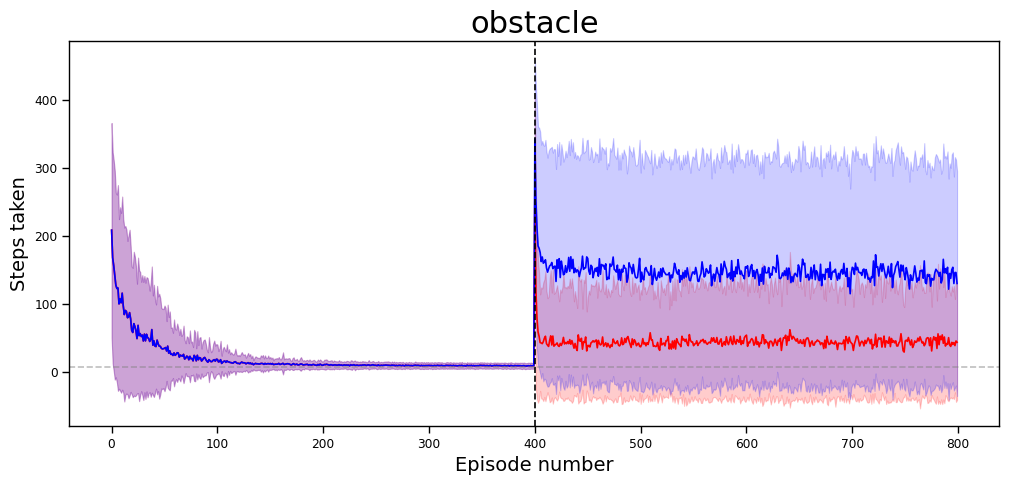

In [12]:
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

plot_path = os.path.join('plots','tdlearning')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
for env_name in env_list:
    suffices = [env_name,'same_policy']
    env = create_grid_env(env_name)

    
    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    save_path = os.path.join(plot_path,'generalization_{}_same_policy.png'.format(env_name))
    fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound,title=env_name)
    
    plt.show()

### with normalization

In [13]:
n_repetitions = 200
num_steps = 400
num_episodes =400
lr = 1e-1
gamma = 0.7


In [21]:

n_repetitions = 200
num_steps = 400
num_episodes = 400
lr = 1e-1
gamma = 0.7


env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

for env_name in env_list:
    results_sym = []
    results_asym = []

    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(run_experiment, env_name, seed=i,lr=lr,gamma=gamma,num_steps=num_steps,num_episodes=num_episodes,mode='copy',normalize=True) for i in range(n_repetitions)]
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc=f"Processing {env_name}"):
            steps_sym, steps_asym = future.result()
            results_sym.append(steps_sym)
            results_asym.append(steps_asym)

    results_sym = np.array(results_sym)
    results_asym = np.array(results_asym)
    suffices = [env_name,'same_policy','normalized']

    save_generalization_data((results_sym, results_asym), agents=['symmetric', 'asymmetric'], path=path, suffices=suffices)


Processing empty: 100%|██████████| 200/200 [04:13<00:00,  1.27s/it]

saved data at data/tdlearning/gen_steps_symmetric_empty_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_empty_same_policy_normalized.npy



Processing four_rooms: 100%|██████████| 200/200 [06:56<00:00,  2.08s/it]


saved data at data/tdlearning/gen_steps_symmetric_four_rooms_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_four_rooms_same_policy_normalized.npy


Processing t_maze: 100%|██████████| 200/200 [04:16<00:00,  1.28s/it]


saved data at data/tdlearning/gen_steps_symmetric_t_maze_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_t_maze_same_policy_normalized.npy


Processing circle: 100%|██████████| 200/200 [03:41<00:00,  1.11s/it]

saved data at data/tdlearning/gen_steps_symmetric_circle_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_circle_same_policy_normalized.npy



Processing detour: 100%|██████████| 200/200 [08:40<00:00,  2.60s/it]


saved data at data/tdlearning/gen_steps_symmetric_detour_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_detour_same_policy_normalized.npy


Processing obstacle: 100%|██████████| 200/200 [06:37<00:00,  1.99s/it]


saved data at data/tdlearning/gen_steps_symmetric_obstacle_same_policy_normalized.npy
saved data at data/tdlearning/gen_steps_asymmetric_obstacle_same_policy_normalized.npy


(800,)
(800,)
(800,)
(800,)


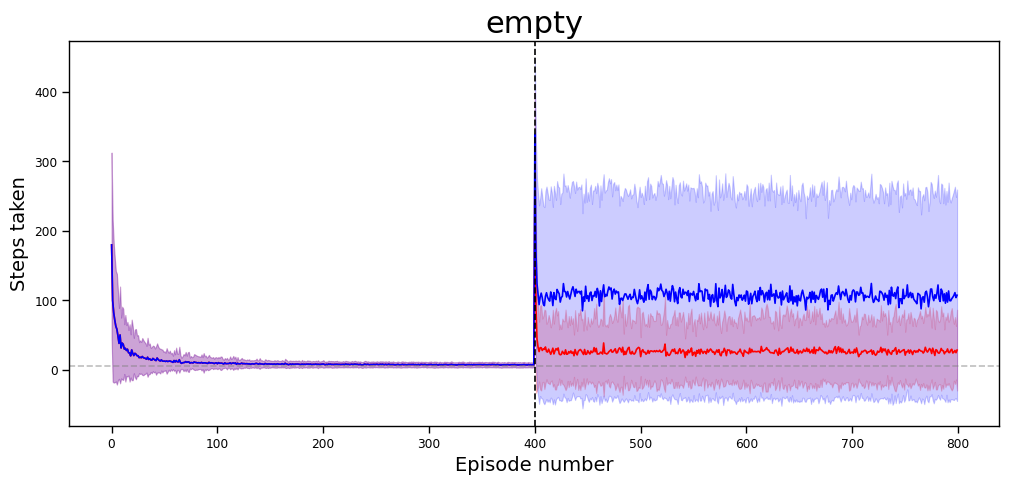

(800,)
(800,)
(800,)
(800,)


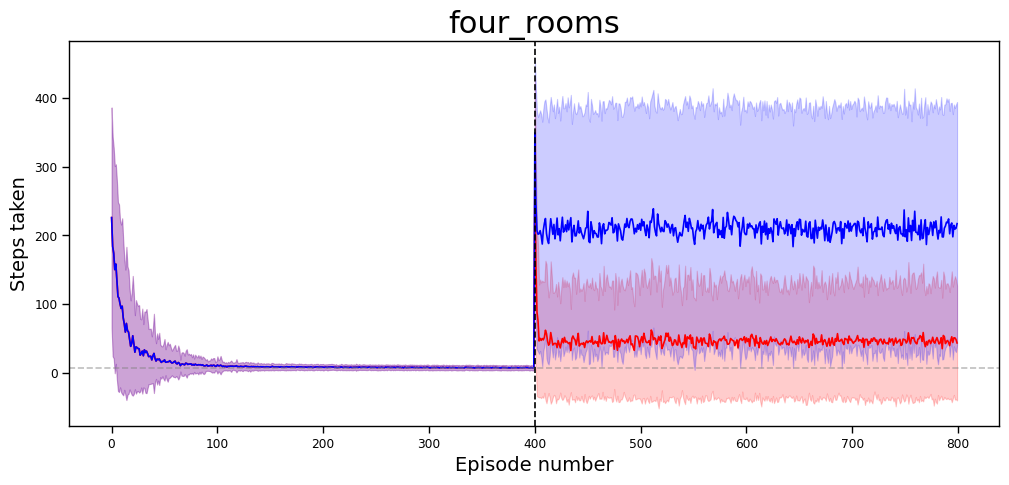

(800,)
(800,)
(800,)
(800,)


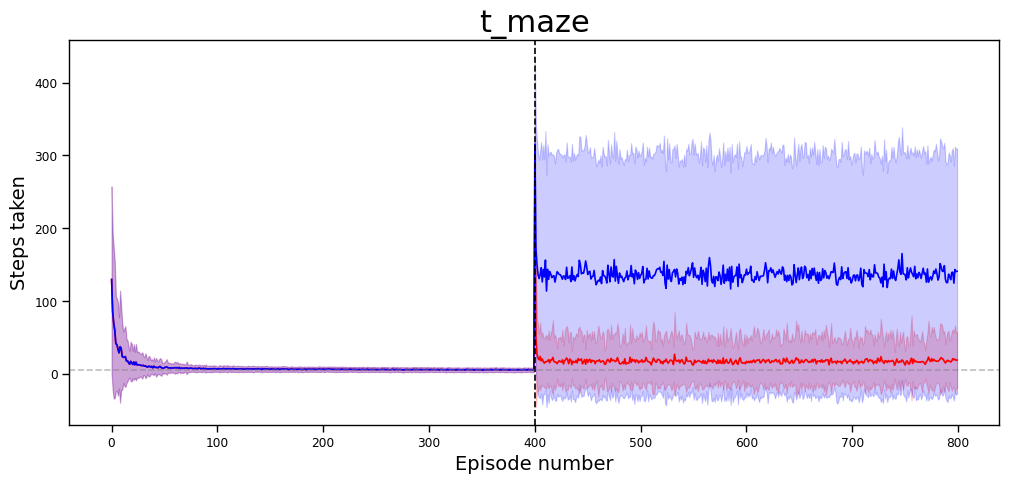

(800,)
(800,)
(800,)
(800,)


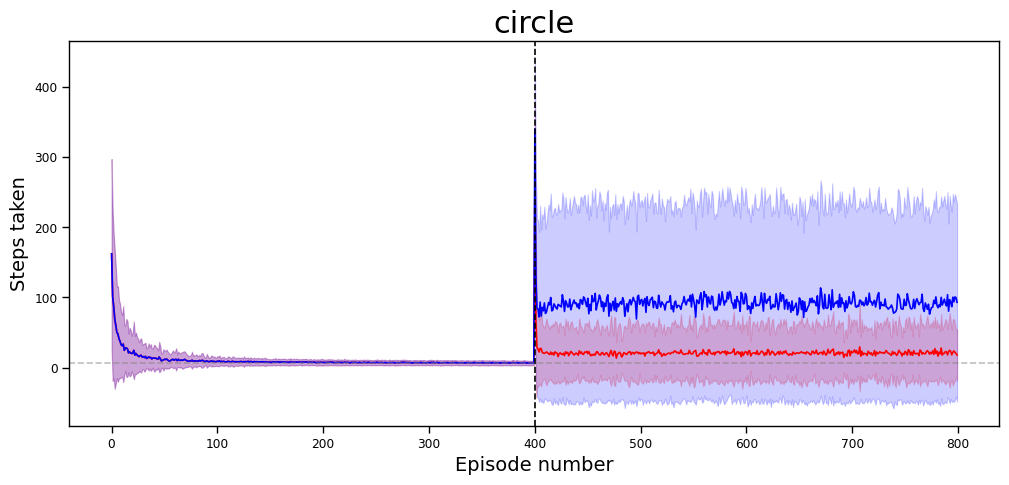

(800,)
(800,)
(800,)
(800,)


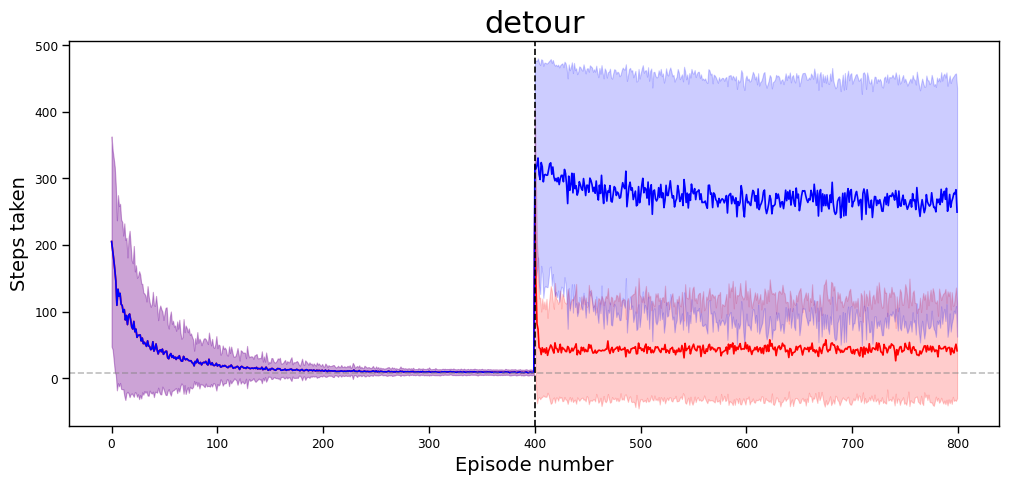

(800,)
(800,)
(800,)
(800,)


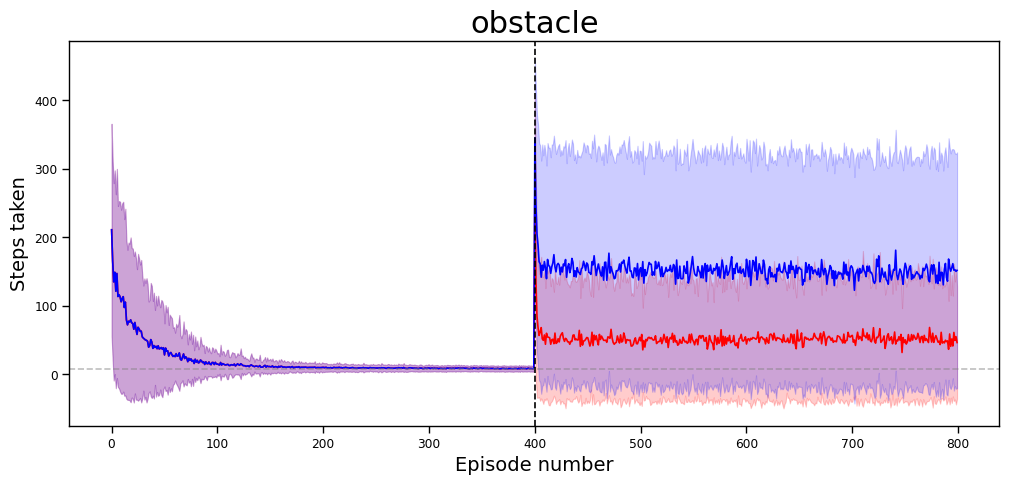

In [14]:
env_list=['empty','four_rooms','t_maze','circle','detour','obstacle']

plot_path = os.path.join('plots','tdlearning')
if not os.path.exists(plot_path):
    os.makedirs(plot_path)
for env_name in env_list:
    suffices = [env_name,'same_policy','normalized']
    env = create_grid_env(env_name)

    lower_bound = env.G.mean_distance()
    
    steps_sym,steps_asym = load_generalization_data(path,suffices=suffices)
    
    save_path = os.path.join(plot_path,'generalization_{}_same_policy_normalized.png'.format(env_name))
    fig,ax = create_generalization_plot(steps_sym,steps_asym,save_path = save_path,lower_bound=lower_bound,title=env_name)
    
    plt.show()